# Google Play Store Apps Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import collections
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [146]:
#upload dataset
data=pd.read_csv('googleplaystore.csv')

In [121]:
sns.set()

### 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Check Last 3 Rows of The Dataset

In [4]:
data.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### 3. Find Shape of Our Dataset (Number of Rows & Number of Columns)

In [5]:
data.shape

(10841, 13)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10841
Number of Columns 13


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 5. Get Overall Statistics About The Dataframe

In [8]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 6. Total Number of App Titles Contain Astrology

In [9]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
len(data[data['App'].str.contains('Astrology',case=False)])

3

### 7. Find Average App Rating

In [10]:
data['Rating'].mean()

4.193338315362443

### 8.  Find Total Number of Unique Category

In [11]:
data['Category'].nunique()

34

### 9. Which Category Getting The Highest Average Rating?

In [12]:
data.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFESTYLE               4.094904
V

### 10. Find Total Number of Apps having 5 Star Rating

In [13]:
len(data[data['Rating']==5.0])

274

### 11. Find Average Value of Reviews

In [14]:
# fixing dataset error 3.0M->3.0
data[data['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
data['Reviews']=data['Reviews'].replace('3.0M',3.0)

In [20]:
data['Reviews']=data['Reviews'].astype('float')

In [21]:
data['Reviews'].dtype

dtype('float64')

In [22]:
data['Reviews'].mean()

444111.9265750392

### 12. Find Total Number of Free and Paid Apps

In [25]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [26]:
data['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

### 13.  Which App Has Maximum Reviews?

In [76]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs1'],
      dtype='object')

In [81]:
data[data['Reviews'].max()==data['Reviews']]['App']

2544    Facebook
Name: App, dtype: object

### 14. Display Top 5 Apps Having Highest Reviews

In [25]:
data[['App','Reviews']].sort_values( by = 'Reviews',ascending=False).head()

,App,Reviews
2544,Facebook,78158306.0
3943,Facebook,78128208.0
381,WhatsApp Messenger,69119316.0
336,WhatsApp Messenger,69119316.0
3904,WhatsApp Messenger,69109672.0


### 15. Find Average Rating of Free and Paid Apps

In [88]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000


In [89]:
data.groupby('Type')['Rating'].mean()

Type
0       19.000000
Free     4.186203
Paid     4.266615
Name: Rating, dtype: float64

### 16. Display Top  5 Apps Having Maximum Installs

In [93]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,"10,000+"


In [28]:
data['Installs_1']=data['Installs'].str.replace(',','')

In [29]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000+


In [30]:
data['Installs_1']=data['Installs_1'].str.replace('+','')

In [31]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000


In [33]:
data[data['Installs_1']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_1
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,Free


In [34]:
data['Installs_1']=data['Installs_1'].str.replace('Free','0')

In [35]:
data['Installs_1']=data['Installs_1'].astype('int')

In [36]:
data['Installs_1'].dtype

dtype('int32')

In [41]:
data[['App','Installs_1']].sort_values(by = 'Installs_1',ascending=False).head()

,App,Installs_1
3896,Subway Surfers,1000000000
3943,Facebook,1000000000
335,Messenger – Text and Video Chat for Free,1000000000
3523,Google Drive,1000000000
3565,Google Drive,1000000000


### Plots and Charts

In [190]:
df=data
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year'],
      dtype='object')

In [191]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018


In [192]:
# changing the last_updated col in datetime format

In [193]:
df['Last Updated'].dtypes

dtype('<M8[ns]')

In [194]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Last Updated'].dtypes

dtype('<M8[ns]')

In [195]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   object        
 4   Size            9360 non-null   object        
 5   Installs        9360 non-null   object        
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   float64       
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
 13  Year            9360 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memor

In [196]:
#craeting a year column

In [197]:
df['Year'] = df['Last Updated'].dt.year

In [198]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Year              0
dtype: int64

In [199]:
df.dropna(inplace = True)

In [200]:
df['Year'] = df['Year'].astype(int)

In [201]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018


In [202]:
# Category Distribution top 7

In [203]:
df1  = df['Category'].value_counts().sort_values(ascending = False).head(7)
df1

Category
FAMILY           1746
GAME             1097
TOOLS             733
PRODUCTIVITY      351
MEDICAL           350
COMMUNICATION     328
FINANCE           323
Name: count, dtype: int64

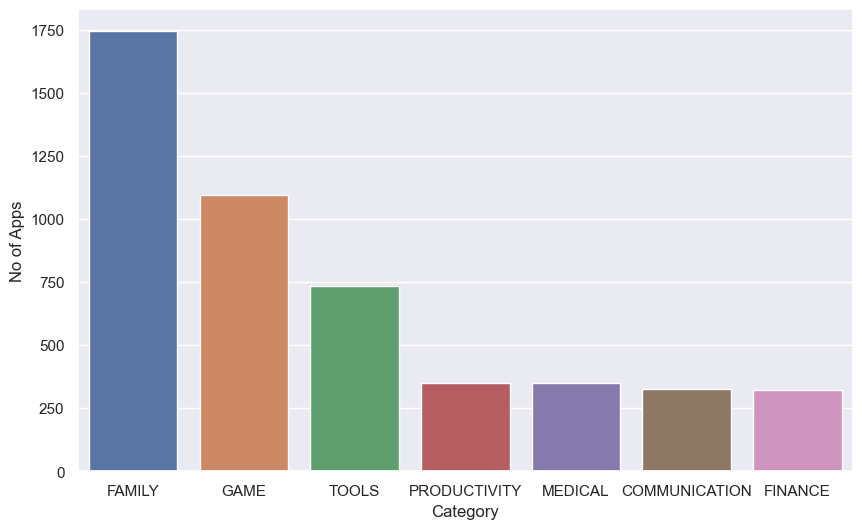

In [204]:
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.values)
plt.ylabel('No of Apps')
plt.show()

In [205]:
# Type -> Free and paid app dist

In [206]:
df2 = df['Type'].value_counts()
df2

Type
Free    8715
Paid     645
Name: count, dtype: int64

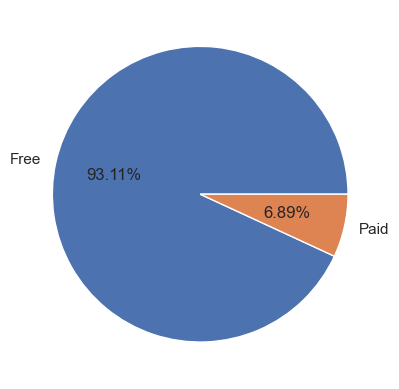

In [207]:
df2.plot(kind = 'pie', autopct = '%1.2f%%')
plt.ylabel(None)
plt.show()

In [208]:
# Yearly trends

In [209]:
df3 = df['Year'].value_counts()
df3

Year
2018    6504
2017    1497
2016     651
2015     388
2014     190
2013      93
2012      21
2011      15
2010       1
Name: count, dtype: int64

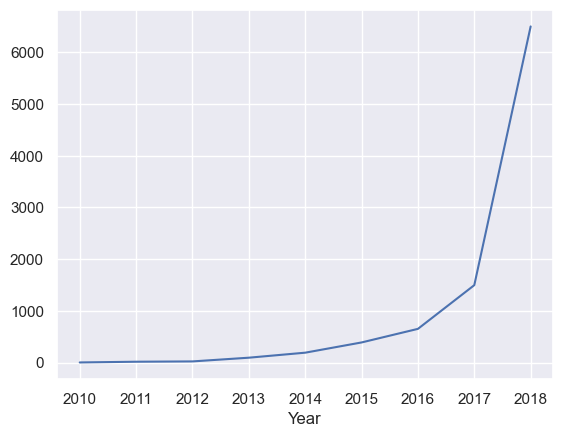

In [210]:
df3.plot(kind = 'line')
plt.show()

In [211]:
# Type wise Yearly app count 

In [212]:
df.groupby(['Type', 'Year'])['Year'].count()

Type  Year
Free  2010       1
      2011      12
      2012      19
      2013      70
      2014     141
      2015     322
      2016     580
      2017    1354
      2018    6216
Paid  2011       3
      2012       2
      2013      23
      2014      49
      2015      66
      2016      71
      2017     143
      2018     288
Name: Year, dtype: int64

In [213]:
# Android Ver

In [214]:
df6 = df['Android Ver'].value_counts().sort_values(ascending  = False).head()
df6

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
Name: count, dtype: int64

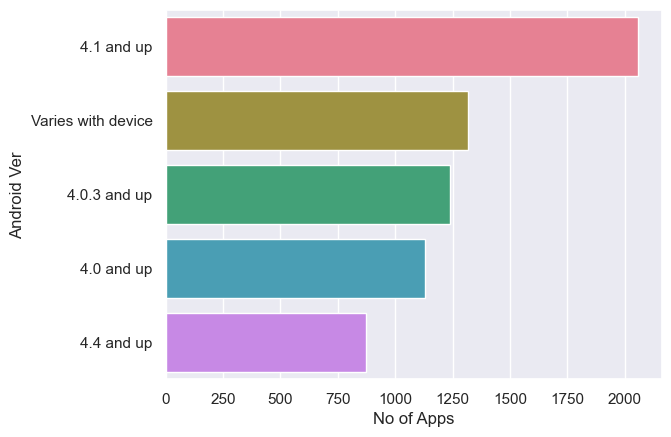

In [215]:
sns.barplot(x = df6.values, y = df6.index, palette = 'husl')
plt.xlabel('No of Apps')
plt.show()

In [216]:
# Genres top 5

In [217]:
df7 = df['Genres'].value_counts().sort_values(ascending = False).head()
df7

Genres
Tools            732
Entertainment    533
Education        468
Action           358
Productivity     351
Name: count, dtype: int64

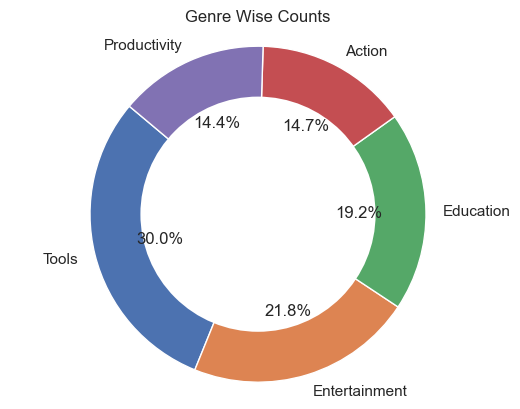

In [218]:
plt.pie(df7.values, labels=df7.index, autopct='%1.1f%%', startangle=140)
plt.title('Genre Wise Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [219]:
# Rating distribution

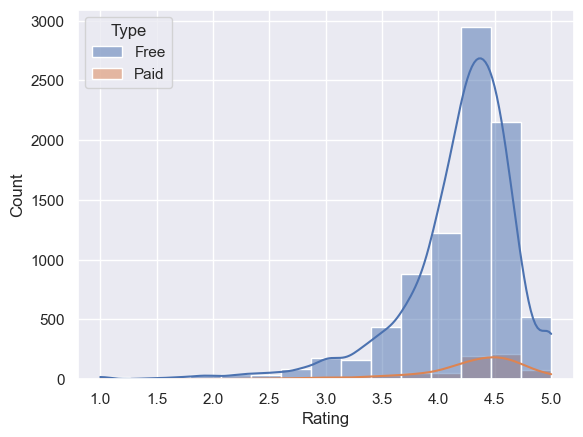

In [220]:
sns.histplot(data = df, x = 'Rating', bins = 15, kde = True, hue = 'Type' )
plt.show()

In [221]:
# Category wise Total App Price top 7

In [222]:
df8 = df.groupby('Category')['Price'].sum().sort_values(ascending = False).head(7)
df8

Category
FINANCE            2439.87
FAMILY             2295.75
LIFESTYLE          1960.88
MEDICAL            1043.14
GAME                280.36
TOOLS               207.90
PERSONALIZATION     126.27
Name: Price, dtype: float64

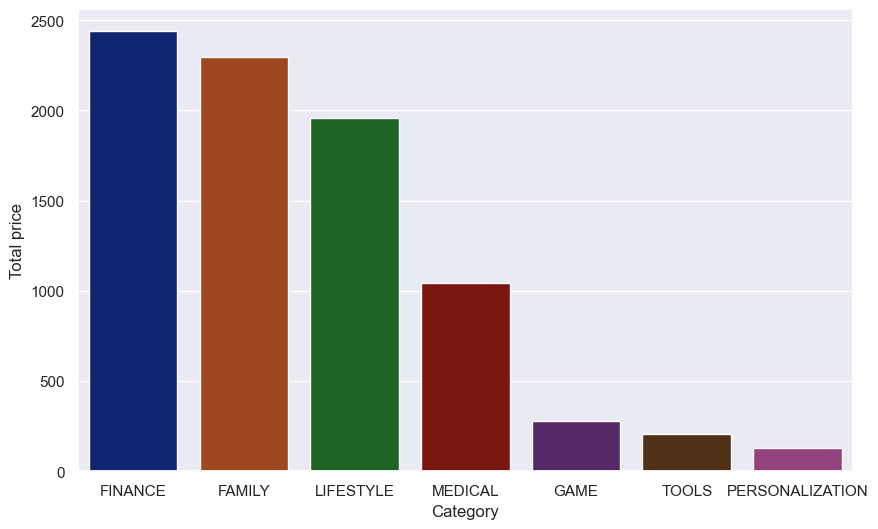

In [223]:
plt.figure(figsize=(10,6))
sns.barplot(x = df8.index, y = df8.values, palette = 'dark')
plt.ylabel('Total price')
plt.show()

In [230]:
# Content Rating

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   object        
 4   Size            9360 non-null   object        
 5   Installs        9360 non-null   object        
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   float64       
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
 13  Year            9360 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memor

In [239]:
df9 = df['Content Rating'].value_counts().head(3)
df9

Content Rating
Everyone      7414
Teen          1084
Mature 17+     461
Name: count, dtype: int64

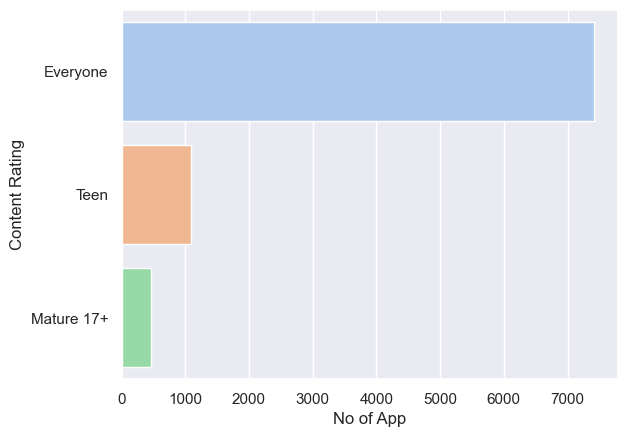

In [263]:
sns.barplot(x = df9.values, y = df9.index, palette = 'pastel')
plt.xlabel('No of App')
plt.show()

In [265]:
# Content Rating Year wise

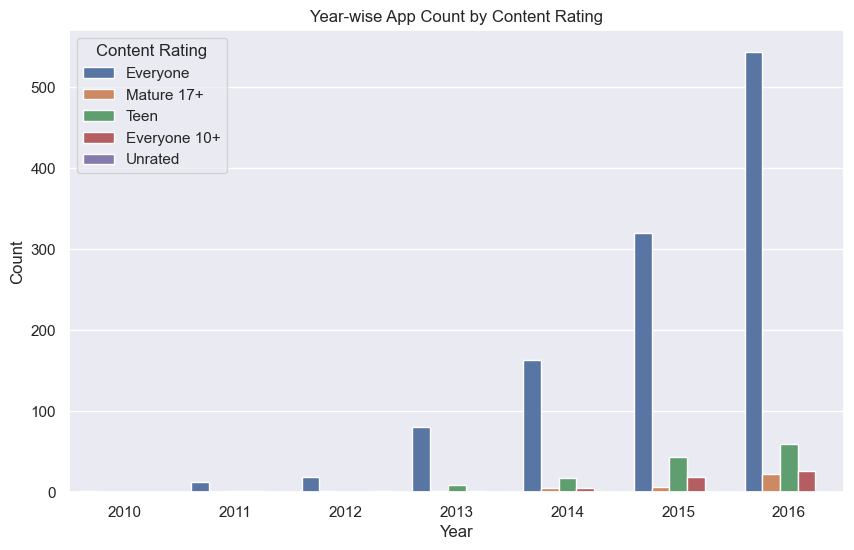

In [257]:
# excluding 2017 , 2018 too big values
plt.figure(figsize=(10, 6))
exclude_years = [2017, 2018]
filtered_df = df[~df['Year'].isin(exclude_years)]
sns.countplot(data=filtered_df, x='Year', hue='Content Rating')
plt.title('Year-wise App Count by Content Rating')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Content Rating')
plt.show()